In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing
import scipy.cluster.hierarchy as shc

In [2]:
path = '/content/2d-4c-no4.arff'
databrut = arff.loadarff(open(path, 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])
print(datanp)

[[ 8.04731  -4.88662 ]
 [11.2375    3.01746 ]
 [ 5.1105    0.269883]
 ...
 [-7.3279    4.97756 ]
 [-1.96973   4.60647 ]
 [-7.83976   4.00496 ]]


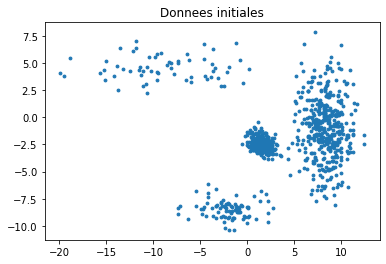

In [3]:
f0 = datanp[:,0] 
f1 = datanp[:,1] 
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

(array([[  3.,   8.,  15.,  16.,  24.,  63., 300.,  40., 282., 112.],
        [  0.,   0.,   3.,  85.,  69., 473., 135.,  88.,  10.,   0.]]),
 array([-19.9513 , -16.70856, -13.46582, -10.22308,  -6.98034,  -3.7376 ,
         -0.49486,   2.74788,   5.99062,   9.23336,  12.4761 ]),
 <a list of 2 Lists of Patches objects>)

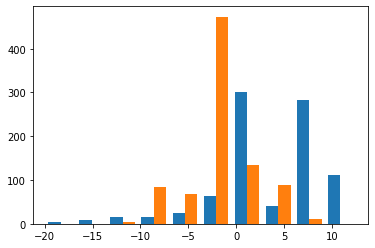

In [4]:
plt.hist(datanp)

In [5]:
scaler = preprocessing.StandardScaler().fit(datanp)

In [6]:
data_scaled = scaler.transform(datanp)

In [7]:
import scipy.cluster.hierarchy as shc

-------------------------------------------
Affichage données standardisées            


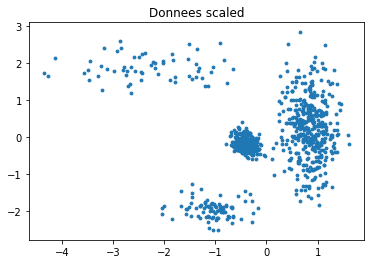

In [8]:
print("-------------------------------------------")
print("Affichage données standardisées            ")
f0_scaled = data_scaled[:,0] # tous les élements de la première colonne
f1_scaled = data_scaled[:,1] # tous les éléments de la deuxième colonne
plt.scatter(f0_scaled, f1_scaled, s=8)
plt.title("Donnees scaled")
plt.show()

-----------------------------------------
Dendrogramme 'complete' données standardisées


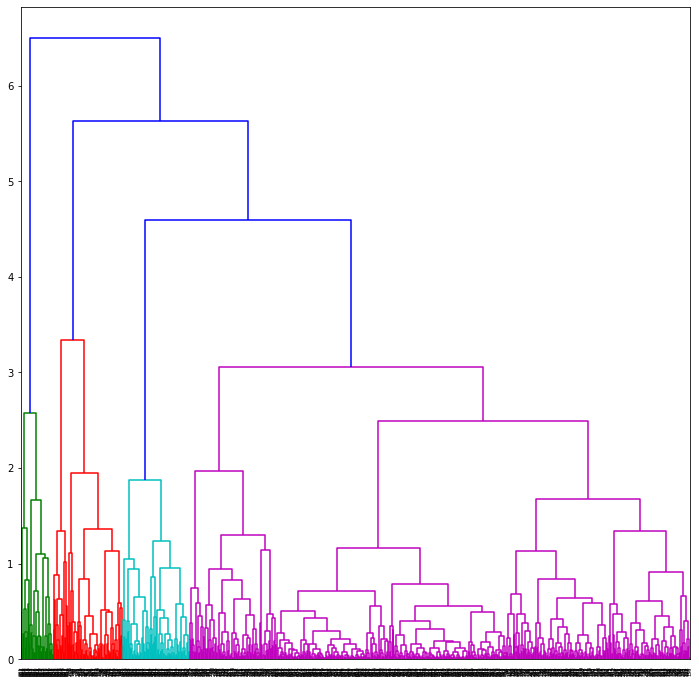

In [9]:
print("-----------------------------------------")
print("Dendrogramme 'complete' données standardisées")

distance = shc.linkage(data_scaled, 'complete')


plt.figure(figsize=(12, 12))
shc.dendrogram(distance,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=False)
plt.show()

In [10]:
sum_err_ = []

-----------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de k fixée


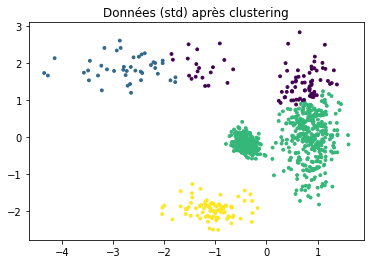

nb clusters = 4 , runtime =  18.57 ms


In [11]:
print("-----------------------------------------------------------")
print("Appel Aglo Clustering 'complete' pour une valeur de k fixée")
tps1 = time.time()
k=4
model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
model_scaled.fit(data_scaled)
#cluster.fit_predict(X)

tps2 = time.time()
labels_scaled = model_scaled.labels_

plt.scatter(f0_scaled, f1_scaled, c=labels_scaled, s=8)
plt.title("Données (std) après clustering")
plt.show()
print("nb clusters =",k,", runtime = ", round((tps2 - tps1)*1000,2),"ms")
sum_err_.append(metrics.silhouette_score(datanp, labels_scaled, metric='euclidean'))

-----------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de k fixée


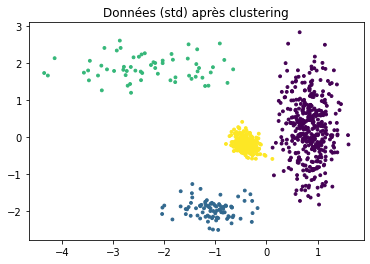

nb clusters = 4 , runtime =  22.14 ms


In [12]:
print("-----------------------------------------------------------")
print("Appel Aglo Clustering 'complete' pour une valeur de k fixée")
tps3 = time.time()
k=4
model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
model_scaled.fit(data_scaled)
#cluster.fit_predict(X)

tps4 = time.time()
labels_scaled = model_scaled.labels_

plt.scatter(f0_scaled, f1_scaled, c=labels_scaled, s=8)
plt.title("Données (std) après clustering")
plt.show()
print("nb clusters =",k,", runtime = ", round((tps4 - tps3)*1000,2),"ms")
sum_err_.append(metrics.silhouette_score(datanp, labels_scaled, metric='euclidean'))

-----------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de k fixée


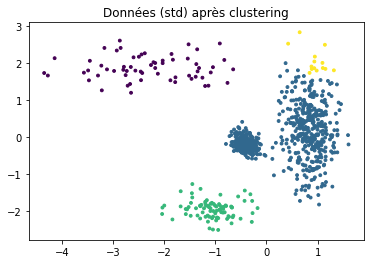

nb clusters = 4 , runtime =  24.49 ms


In [13]:
print("-----------------------------------------------------------")
print("Appel Aglo Clustering 'complete' pour une valeur de k fixée")
tps3 = time.time()
k=4
model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
model_scaled.fit(data_scaled)
#cluster.fit_predict(X)

tps4 = time.time()
labels_scaled = model_scaled.labels_

plt.scatter(f0_scaled, f1_scaled, c=labels_scaled, s=8)
plt.title("Données (std) après clustering")
plt.show()
print("nb clusters =",k,", runtime = ", round((tps4 - tps3)*1000,2),"ms")
sum_err_.append(metrics.silhouette_score(datanp, labels_scaled, metric='euclidean'))

-----------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de k fixée


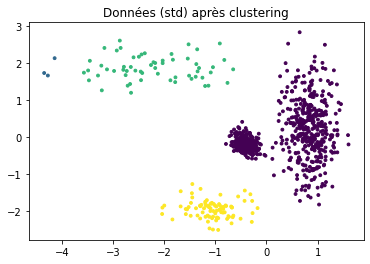

nb clusters = 4 , runtime =  11.36 ms


In [14]:
print("-----------------------------------------------------------")
print("Appel Aglo Clustering 'complete' pour une valeur de k fixée")
tps3 = time.time()
k=4
model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
model_scaled.fit(data_scaled)
#cluster.fit_predict(X)

tps4 = time.time()
labels_scaled = model_scaled.labels_

plt.scatter(f0_scaled, f1_scaled, c=labels_scaled, s=8)
plt.title("Données (std) après clustering")
plt.show()
print("nb clusters =",k,", runtime = ", round((tps4 - tps3)*1000,2),"ms")
sum_err_.append(metrics.silhouette_score(datanp, labels_scaled, metric='euclidean'))

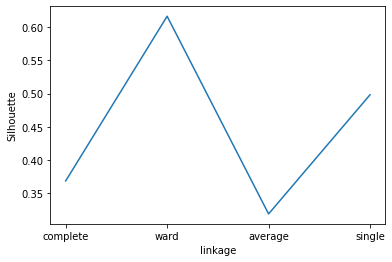

In [15]:
plt.plot(["complete","ward","average","single"],sum_err_)
plt.xlabel("linkage")
plt.ylabel("Silhouette")
plt.show()

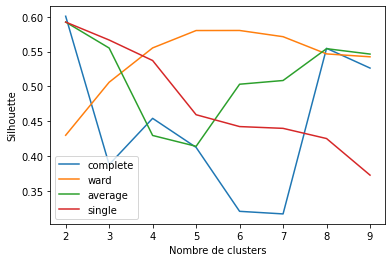

In [16]:
sum_err_2_1 = []
sum_err_2_2 = []
sum_err_2_3 = []
sum_err_2_4 = []
link = ["complete","ward","average","single"]
for l in link : 
  for i in range(2,10) :
    sil= cluster.AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage=l)
    sil.fit(data_scaled)
    
    if (l=="complete"):
      sum_err_2_1.append(metrics.silhouette_score(data_scaled, sil.labels_, metric='euclidean'))
    elif (l=="ward"):
      sum_err_2_2.append(metrics.silhouette_score(data_scaled, sil.labels_, metric='euclidean'))
    elif (l=="average"):
      sum_err_2_3.append(metrics.silhouette_score(data_scaled, sil.labels_, metric='euclidean'))
    elif (l=="single"):
      sum_err_2_4.append(metrics.silhouette_score(data_scaled, sil.labels_, metric='euclidean'))

plt.plot(range(2,10), sum_err_2_1, label=link[0])
plt.plot(range(2,10), sum_err_2_2, label=link[1])
plt.plot(range(2,10), sum_err_2_3, label=link[2])
plt.plot(range(2,10), sum_err_2_4,label=link[3])
plt.legend()
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette")
plt.show()


# Nouvelle section
BANANA

BANANA

In [17]:
path = '/content/banana.arff'
databrut = arff.loadarff(open(path, 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])
print(datanp)

[[0.228 0.559]
 [0.216 0.528]
 [0.221 0.552]
 ...
 [0.513 0.233]
 [0.506 0.221]
 [0.515 0.26 ]]


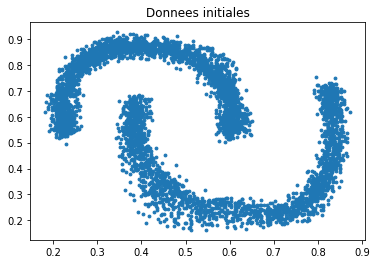

In [18]:
f0 = datanp[:,0] 
f1 = datanp[:,1] 
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

In [19]:
data_scaled = scaler.transform(datanp)

-----------------------------------------
Dendrogramme 'complete' données standardisées


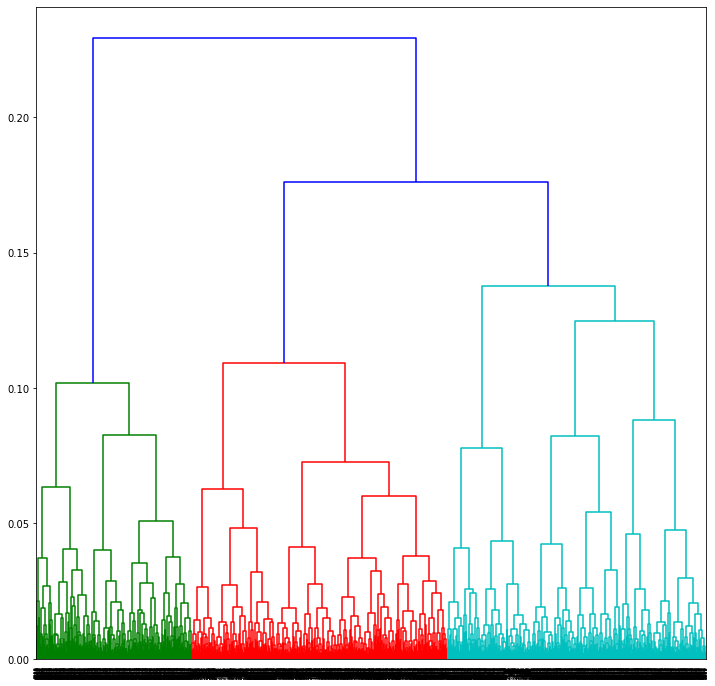

In [20]:
print("-----------------------------------------")
print("Dendrogramme 'complete' données standardisées")

distance = shc.linkage(data_scaled, 'complete')


plt.figure(figsize=(12, 12))
shc.dendrogram(distance,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=False)
plt.show()

-------------------------------------------
Affichage données standardisées            


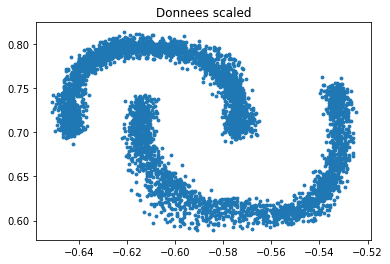

In [21]:
sum_err_ = []
print("-------------------------------------------")
print("Affichage données standardisées            ")
f0_scaled = data_scaled[:,0] # tous les élements de la première colonne
f1_scaled = data_scaled[:,1] # tous les éléments de la deuxième colonne
plt.scatter(f0_scaled, f1_scaled, s=8)
plt.title("Donnees scaled")
plt.show()

-----------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de k fixée


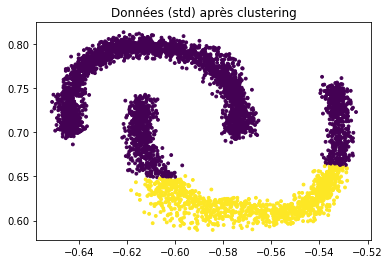

nb clusters = 2 , runtime =  351.58 ms


In [22]:
print("-----------------------------------------------------------")
print("Appel Aglo Clustering 'complete' pour une valeur de k fixée")
tps1 = time.time()
k=2
model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
model_scaled.fit(data_scaled)
#cluster.fit_predict(X)

tps2 = time.time()
labels_scaled = model_scaled.labels_

plt.scatter(f0_scaled, f1_scaled, c=labels_scaled, s=8)
plt.title("Données (std) après clustering")
plt.show()
print("nb clusters =",k,", runtime = ", round((tps2 - tps1)*1000,2),"ms")
sum_err_.append(metrics.silhouette_score(datanp, labels_scaled, metric='euclidean'))

-----------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de k fixée


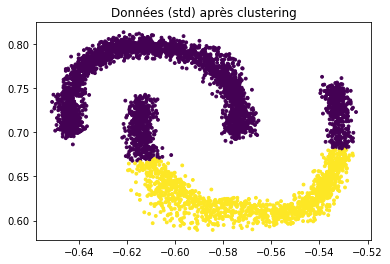

nb clusters = 2 , runtime =  488.51 ms


In [23]:
print("-----------------------------------------------------------")
print("Appel Aglo Clustering 'complete' pour une valeur de k fixée")
tps3 = time.time()
k=2
model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
model_scaled.fit(data_scaled)
#cluster.fit_predict(X)

tps4 = time.time()
labels_scaled = model_scaled.labels_

plt.scatter(f0_scaled, f1_scaled, c=labels_scaled, s=8)
plt.title("Données (std) après clustering")
plt.show()
print("nb clusters =",k,", runtime = ", round((tps4 - tps3)*1000,2),"ms")
sum_err_.append(metrics.silhouette_score(datanp, labels_scaled, metric='euclidean'))

-----------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de k fixée


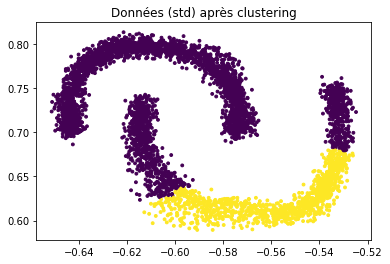

nb clusters = 2 , runtime =  359.33 ms


In [24]:
print("-----------------------------------------------------------")
print("Appel Aglo Clustering 'complete' pour une valeur de k fixée")
tps3 = time.time()
k=2
model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
model_scaled.fit(data_scaled)
#cluster.fit_predict(X)

tps4 = time.time()
labels_scaled = model_scaled.labels_

plt.scatter(f0_scaled, f1_scaled, c=labels_scaled, s=8)
plt.title("Données (std) après clustering")
plt.show()
print("nb clusters =",k,", runtime = ", round((tps4 - tps3)*1000,2),"ms")
sum_err_.append(metrics.silhouette_score(datanp, labels_scaled, metric='euclidean'))

-----------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de k fixée


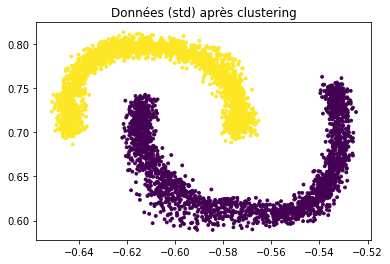

nb clusters = 2 , runtime =  139.31 ms


In [25]:
print("-----------------------------------------------------------")
print("Appel Aglo Clustering 'complete' pour une valeur de k fixée")
tps3 = time.time()
k=2
model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
model_scaled.fit(data_scaled)
#cluster.fit_predict(X)

tps4 = time.time()
labels_scaled = model_scaled.labels_

plt.scatter(f0_scaled, f1_scaled, c=labels_scaled, s=8)
plt.title("Données (std) après clustering")
plt.show()
print("nb clusters =",k,", runtime = ", round((tps4 - tps3)*1000,2),"ms")
sum_err_.append(metrics.silhouette_score(datanp, labels_scaled, metric='euclidean'))

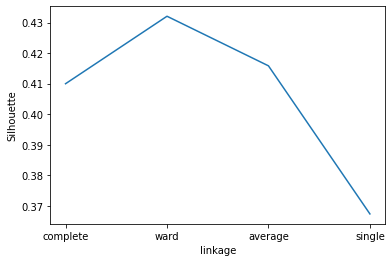

In [26]:
plt.plot(["complete","ward","average","single"],[sum_err_[0],sum_err_[1],sum_err_[2],sum_err_[3]])
plt.xlabel("linkage")
plt.ylabel("Silhouette")
plt.show()

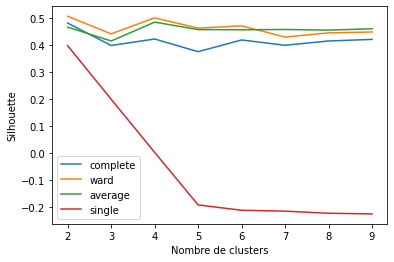

In [27]:
sum_err_2_5 = []
sum_err_2_6 = []
sum_err_2_7 = []
sum_err_2_8 = []
link = ["complete","ward","average","single"]
for l in link : 
  for i in range(2,10) :
    sil= cluster.AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage=l)
    sil.fit(data_scaled)
    
    if (l=="complete"):
      sum_err_2_5.append(metrics.silhouette_score(data_scaled, sil.labels_, metric='euclidean'))
    elif (l=="ward"):
      sum_err_2_6.append(metrics.silhouette_score(data_scaled, sil.labels_, metric='euclidean'))
    elif (l=="average"):
      sum_err_2_7.append(metrics.silhouette_score(data_scaled, sil.labels_, metric='euclidean'))
    elif (l=="single"):
      sum_err_2_8.append(metrics.silhouette_score(data_scaled, sil.labels_, metric='euclidean'))

plt.plot(range(2,10), sum_err_2_5, label=link[0])
plt.plot(range(2,10), sum_err_2_6, label=link[1])
plt.plot(range(2,10), sum_err_2_7, label=link[2])
plt.plot(range(2,10), sum_err_2_8, label=link[3])
plt.legend()
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette")
plt.show()

In [28]:
from sklearn.neighbors import NearestNeighbors

In [29]:
distance=0.3
min_pts=10
cl_pred = cluster.DBSCAN(eps=distance, min_samples=min_pts).fit_predict(data_scaled)

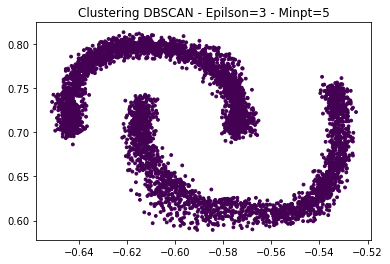

In [30]:
plt.scatter(f0_scaled, f1_scaled, c=cl_pred, s=8)
plt.title("Clustering DBSCAN - Epilson=3 - Minpt=5")
plt.show()


In [31]:
cl_pred

array([0, 0, 0, ..., 0, 0, 0])